In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os

In [8]:
filename = '/shared/2/projects/cross-lingual-exchange/results/overall_att_temporal_hashtag_top100_with_rt_by_topic_11-02-2021.tsv' 

In [9]:
df = pd.read_csv(filename,sep='\t')

In [10]:
df

,Topic,Estimate,Std. Error,P-value,Robust Std. Error,Robust P-value,Treated_Outcome0,Treated_Outcome1,Untreated_Outcome0,Untreated_Outcome1
0,1,2.854764,0.012203,0.000000e+00,0.013272,0.000000e+00,3812943,7002,161619138,52986
1,10,1.765766,0.009787,0.000000e+00,0.010250,0.000000e+00,3808951,10994,161536014,136110
2,19,2.785690,0.004913,0.000000e+00,0.005297,0.000000e+00,3774744,45201,161274070,398054
3,24,0.659898,0.029055,1.990873e-46,0.027434,7.365344e-52,3818544,1401,161627909,44215
4,44,2.933117,0.015683,0.000000e+00,0.016100,0.000000e+00,3815157,4788,161638734,33390
5,3,15.988644,0.009816,0.000000e+00,0.011751,0.000000e+00,3804680,15265,161639658,32466
6,16,3.018146,0.007815,0.000000e+00,0.008492,0.000000e+00,3802611,17334,161540082,132042
7,31,1.631271,0.009368,0.000000e+00,0.009946,0.000000e+00,3808355,11590,161506906,165218
8,11,8.763555,0.008299,0.000000e+00,0.009599,0.000000e+00,3800573,19372,161622517,49607
9,23,4.677249,0.004817,0.000000e+00,0.005401,0.000000e+00,3770351,49594,161396818,275306


In [31]:
df['Treated_Prob'] = df['Treated_Outcome1'] / (df['Treated_Outcome0']+df['Treated_Outcome1'])

In [32]:
probs_df = df[['Topic','Treated_Prob']]

In [9]:
def sig(df,colname):
    if (df[colname] <= .001):
        return '***'
    elif (df[colname] <= .01):
        return '**'
    elif (df[colname] <= .05):
        return '*'
    elif (df[colname] <= .1):
        return '.'
    else:
        return 'n.s.'

In [10]:
df_overall['ci'] = df_overall['Std. Error'] * 1.96
df_overall['sig'] = df_overall.apply(sig,colname='P-value', axis = 1)

/Users/juliame/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/juliame/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df_overall = df_overall.sort_values(by='Country Pair')

In [26]:
def annotate(data, **kws):
    bar_pos = [0,1]
    plt.errorbar(x=bar_pos,y=data['Risk Ratio'],yerr=data['ci'],ecolor='black',ls='none',lw=.5)
    plt.axhline(1,color='black',linewidth=1)
    stars = list(data['sig'])
    for i,_ in enumerate(stars):
        plt.text(i+.05,max(0,1.01*list(data['Risk Ratio'])[i]),stars[i])
        plt.text(i-.3,max(0,1.01*list(data['Risk Ratio'])[i]),round(list(data['Risk Ratio'])[i],3))

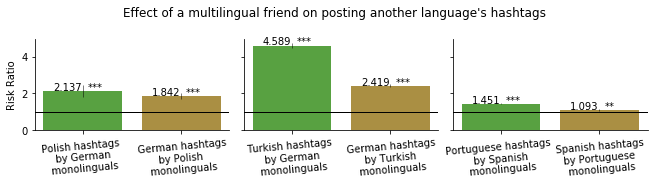

In [31]:
g = sns.FacetGrid(df_overall, col="Country Pair",sharex=False,sharey=True,margin_titles=False,height=2, aspect=1.5)
g.map_dataframe(sns.barplot, x="Country", y="Risk Ratio",palette=sns.color_palette('husl')[2::-1])
g.map_dataframe(annotate)
g.set_axis_labels("Country","Risk Ratio")
ax1 = g.axes.flat[0]
ax2 = g.axes.flat[1]
ax3 = g.axes.flat[2]
ax1.set_xticklabels(['Polish hashtags \n by German \n monolinguals','  German hashtags \n by Polish \n monolinguals'],size=10,rotation=5)
ax2.set_xticklabels(['Turkish hashtags \n by German \n monolinguals','  German hashtags \n by Turkish \n monolinguals'],size=10,rotation=5)
ax3.set_xticklabels(['Portuguese hashtags \n by Spanish \n monolinguals','  Spanish hashtags \n by Portuguese \n monolinguals'],size=10,rotation=5)
# ax1.set_ylim((.25, 1.75))
# ax2.set_ylim((.25, 1.75))
# ax3.set_ylim((.25, 1.75))
g.set_titles('')
g.set_xlabels('')
g.fig.suptitle('Effect of a multilingual friend on posting another language\'s hashtags', y=1.05)
#People who tweet in non-dominant language have higher betweenness centrality
#plt.savefig('multilingual_friend_hashtag_binary_plot.pdf',bbox_inches='tight')
plt.show()


In [11]:
topic_map = {}
topic_map['1'] = 'TV Shows' 
topic_map['10'] = 'Fandoms'
topic_map['19'] = 'Art'
topic_map['24'] = 'Romance'
topic_map['44'] = 'TV Promo'
topic_map['3'] = 'Job Promo'
topic_map['16'] = 'Giveaways'
topic_map['31'] = 'Music Promo'
topic_map['11'] = 'Government, News'
topic_map['23'] = 'Covid, Crisis, Tech'
topic_map['30'] = 'International Politics'
topic_map['41'] = 'Health'
topic_map['46'] = 'Requests'
topic_map['47'] = 'Equality'
topic_map['48'] = 'Sports'

In [12]:
entertainment_topics = ['1','10','19','24','44']
promotion_topics = ['3','16','31']
politics_topics = ['11','23','30','41','46','47']
sports_topics = ['48']

In [13]:
topic_desc = []
for topic in df['Topic']:
    if str(topic) in topic_map:
        topic_desc.append(topic_map[str(topic)])
    else:
        topic_desc.append(None)

In [14]:
macro_topic = []
for topic in df['Topic']:
    if str(topic) in entertainment_topics:
        macro_topic.append('Entertainment')
    elif str(topic) in promotion_topics:
        macro_topic.append('Promotion')
    elif str(topic) in politics_topics:
        macro_topic.append('Political')
    else:
        macro_topic.append('Sports')
    

In [15]:
macro_topic

['Entertainment',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'Entertainment',
 'Promotion',
 'Promotion',
 'Promotion',
 'Political',
 'Political',
 'Political',
 'Political',
 'Political',
 'Political',
 'Sports']

In [17]:
df['Topic'] = topic_desc
df['Macro Category'] = macro_topic
df['Log-Odds'] = np.log(df['Estimate'])

In [18]:
df = df.sort_values(by='Log-Odds')

In [19]:
plots_dir = '/shared/2/projects/cross-lingual-exchange/results/plots'

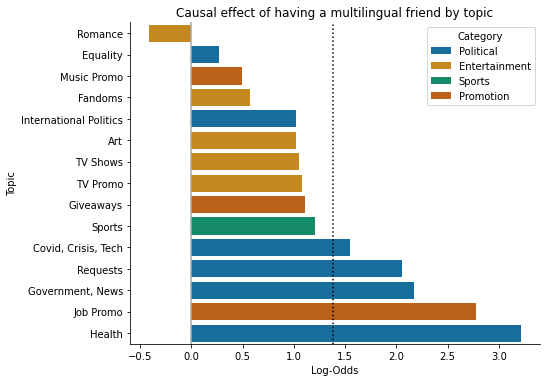

In [20]:
sns.set_palette('colorblind')
sns.catplot(y='Topic',x='Log-Odds',data=df,kind='bar',hue='Macro Category',dodge=False,legend=False,aspect=1.5,
           hue_order=['Political','Entertainment','Sports','Promotion'])
overall_hashtag_effect = 3.975854
plt.axvline(np.log(overall_hashtag_effect),linestyle=':',color='black')
plt.axvline(0,color='darkgrey')
#plt.title(f"{country_pair}: monolinguals from {country} using other language hashtags")
plt.title("Causal effect of having a multilingual friend by topic")
plt.legend(title='Category')
#plt.savefig(os.path.join(plots_dir,'effect_by_topic.pdf'),bbox_inches='tight')
plt.show()

In [105]:
np.log(overall_hashtag_effect)

1.3802395677981885

In [ ]:
#normalized deviation
#(topic_rr - all_rr) / all_rr 

In [68]:
df_all = df[df['Topic']=='all']
df_all['Overall Risk Ratio'] = df_all['Risk Ratio']
df_all = df_all[['Country Pair','Country','Overall Risk Ratio']]

/Users/juliame/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
df_all

,Country Pair,Country,Overall Risk Ratio
0,DE_TR,DE,4.588922
12,DE_TR,TR,2.419483
32,ES_PT,ES,1.451451
68,ES_PT,PT,1.093456
84,DE_PL,DE,2.137367
104,DE_PL,PL,1.842063


In [71]:
df = df.merge(df_all,on=('Country Pair','Country'))

In [72]:
df['Deviation'] = (df['Risk Ratio'] - df['Overall Risk Ratio']) / df['Overall Risk Ratio']

In [96]:
df1 = df[df['Topic'].isin(topic_map.keys())]

In [101]:
df1

,Country Pair,Country,Topic,Risk Ratio,Std. Error,P-value,topic_desc,Overall Risk Ratio,Deviation
1,DE_TR,DE,4,7.208342,0.157649,5.423548e-36,Days/Holidays,4.588922,0.570814
2,DE_TR,DE,10,9.344835,0.327134,8.440482e-12,Entertainment-kpop-music,4.588922,1.036390
3,DE_TR,DE,11,11.203062,0.136645,7.005468e-70,Politics-news,4.588922,1.441327
5,DE_TR,DE,19,2.661797,0.153201,1.661142e-10,Entertainment-art,4.588922,-0.419952
7,DE_TR,DE,23,3.815028,0.121915,4.769027e-28,Politics,4.588922,-0.168644
8,DE_TR,DE,30,6.653413,0.132334,1.766409e-46,Politics-Regions,4.588922,0.449886
10,DE_TR,DE,47,7.233783,0.366016,6.448943e-08,Politics-feminism,4.588922,0.576358
11,DE_TR,DE,48,5.670248,0.353715,9.319284e-07,Soccer,4.588922,0.235638
13,DE_TR,TR,1,4.468766,0.388669,1.172143e-04,Entertainment-TV,2.419483,0.846992
14,DE_TR,TR,4,4.341348,0.369865,7.202176e-05,Days/Holidays,2.419483,0.794329


Text(0.5, 1, 'Normalized deviation from overall ATT')

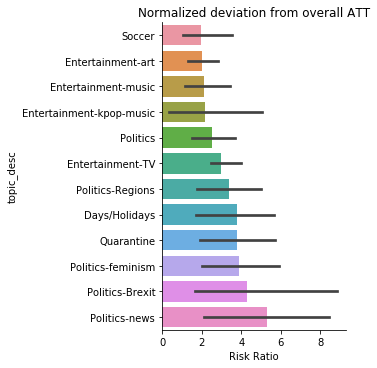

In [110]:
order = df1.groupby(by='topic_desc').agg('mean').reset_index().sort_values(by='Risk Ratio')['topic_desc']
sns.catplot(x='Risk Ratio',y='topic_desc',data=df1,kind='bar',order=order)
plt.title('Normalized deviation from overall ATT')

In [93]:
df.groupby(by='Topic').agg('mean').reset_index().sort_values(by='Deviation')['Topic']
#network superimposed on map and network calculations timeline
#Get plan in by Tuesday, roadmap for eval and figures etc

30     46
23     36
15     27
17      3
1      10
6      16
27     41
33      5
32     48
5      15
13     25
8      19
22     35
38    all
10     22
12     24
19     31
20     32
11     23
21     33
25     39
29     44
37      9
18     30
26      4
0       1
31     47
7      17
3      12
14     26
28     43
36      8
2      11
34      6
9      21
24     37
4      14
16     29
35      7
Name: Topic, dtype: object

In [3]:
margins_dir = '/shared/2/projects/cross-lingual-exchange/models/causal_inference/'
hashtag_margins_file = os.path.join(margins_dir,'margins_temporal_hashtags_topic47_11-02-2021.tsv')

In [40]:
margin_dfs = []
for topic in topic_map:
    filename = os.path.join(margins_dir,f'overall_topic_{topic}_11-02-2021_margins.tsv')
    margin_df = pd.read_csv(filename,sep='\t')
    margin_df['Topic_ID'] = topic
    margin_df['Topic'] = topic_map[topic]
    margin_dfs.append(margin_df)

In [41]:
margin_df = pd.concat(margin_dfs)
margin_df = margin_df[margin_df['factor']=='has_bilingual_neighbor']
margin_df.sort_values(by='AME')

,factor,AME,SE,z,p,lower,upper,Topic_ID,Topic
0,has_bilingual_neighbor,-0.000116,0.000008,-14.364345,8.662121e-47,-0.000132,-0.000100,24,Romance
0,has_bilingual_neighbor,0.000059,0.000001,44.242573,0.000000e+00,0.000057,0.000062,46,Requests
0,has_bilingual_neighbor,0.000078,0.000007,11.286963,1.522058e-29,0.000064,0.000091,47,Equality
0,has_bilingual_neighbor,0.000255,0.000004,61.727031,0.000000e+00,0.000247,0.000263,44,TV Promo
0,has_bilingual_neighbor,0.000322,0.000003,103.120740,0.000000e+00,0.000316,0.000328,41,Health
0,has_bilingual_neighbor,0.000401,0.000005,77.869402,0.000000e+00,0.000391,0.000412,1,TV Shows
0,has_bilingual_neighbor,0.000508,0.000009,56.493011,0.000000e+00,0.000490,0.000525,10,Fandoms
0,has_bilingual_neighbor,0.000529,0.000010,51.175224,0.000000e+00,0.000509,0.000549,31,Music Promo
0,has_bilingual_neighbor,0.000808,0.000005,150.614148,0.000000e+00,0.000798,0.000819,3,Job Promo
0,has_bilingual_neighbor,0.000920,0.000006,166.688511,0.000000e+00,0.000909,0.000931,11,"Government, News"


In [33]:
probs_df

,Topic,Treated_Prob
3,Romance,0.000367
13,Equality,0.000819
7,Music Promo,0.003034
1,Fandoms,0.002878
10,International Politics,0.007556
2,Art,0.011833
0,TV Shows,0.001833
4,TV Promo,0.001253
6,Giveaways,0.004538
14,Sports,0.019394


In [43]:
margin_df = margin_df.merge(probs_df,on='Topic')

In [44]:
margin_df

,factor,AME,SE,z,p,lower,upper,Topic_ID,Topic,Treated_Prob
0,has_bilingual_neighbor,0.000401,0.000005,77.869402,0.000000e+00,0.000391,0.000412,1,TV Shows,0.001833
1,has_bilingual_neighbor,0.000508,0.000009,56.493011,0.000000e+00,0.000490,0.000525,10,Fandoms,0.002878
2,has_bilingual_neighbor,0.002763,0.000014,192.425118,0.000000e+00,0.002735,0.002791,19,Art,0.011833
3,has_bilingual_neighbor,-0.000116,0.000008,-14.364345,8.662121e-47,-0.000132,-0.000100,24,Romance,0.000367
4,has_bilingual_neighbor,0.000255,0.000004,61.727031,0.000000e+00,0.000247,0.000263,44,TV Promo,0.001253
5,has_bilingual_neighbor,0.000808,0.000005,150.614148,0.000000e+00,0.000798,0.000819,3,Job Promo,0.003996
6,has_bilingual_neighbor,0.001005,0.000008,127.287025,0.000000e+00,0.000990,0.001021,16,Giveaways,0.004538
7,has_bilingual_neighbor,0.000529,0.000010,51.175224,0.000000e+00,0.000509,0.000549,31,Music Promo,0.003034
8,has_bilingual_neighbor,0.000920,0.000006,166.688511,0.000000e+00,0.000909,0.000931,11,"Government, News",0.005071
9,has_bilingual_neighbor,0.003095,0.000012,262.369986,0.000000e+00,0.003072,0.003119,23,"Covid, Crisis, Tech",0.012983


In [45]:
margin_df['Prob Increase Percent'] = margin_df['AME'] / (margin_df['Treated_Prob'] - margin_df['AME'])

In [47]:
margin_df.sort_values(by='Prob Increase Percent')

,factor,AME,SE,z,p,lower,upper,Topic_ID,Topic,Treated_Prob,Prob Increase Percent
3,has_bilingual_neighbor,-0.000116,0.000008,-14.364345,8.662121e-47,-0.000132,-0.000100,24,Romance,0.000367,-0.240128
13,has_bilingual_neighbor,0.000078,0.000007,11.286963,1.522058e-29,0.000064,0.000091,47,Equality,0.000819,0.105103
7,has_bilingual_neighbor,0.000529,0.000010,51.175224,0.000000e+00,0.000509,0.000549,31,Music Promo,0.003034,0.211140
1,has_bilingual_neighbor,0.000508,0.000009,56.493011,0.000000e+00,0.000490,0.000525,10,Fandoms,0.002878,0.214264
11,has_bilingual_neighbor,0.000322,0.000003,103.120740,0.000000e+00,0.000316,0.000328,41,Health,0.001782,0.220708
8,has_bilingual_neighbor,0.000920,0.000006,166.688511,0.000000e+00,0.000909,0.000931,11,"Government, News",0.005071,0.221575
12,has_bilingual_neighbor,0.000059,0.000001,44.242573,0.000000e+00,0.000057,0.000062,46,Requests,0.000311,0.234967
5,has_bilingual_neighbor,0.000808,0.000005,150.614148,0.000000e+00,0.000798,0.000819,3,Job Promo,0.003996,0.253482
4,has_bilingual_neighbor,0.000255,0.000004,61.727031,0.000000e+00,0.000247,0.000263,44,TV Promo,0.001253,0.254922
10,has_bilingual_neighbor,0.001572,0.000011,145.346401,0.000000e+00,0.001551,0.001594,30,International Politics,0.007556,0.262748
